<a href="https://colab.research.google.com/github/BiancaStadl/ProjektarbeitML/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GloVe embeddings taken from:

Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. [pdf] [bib]

hatespeechdata taken from (https://hatespeechdata.com/): Wiegand, M., Siegel, M. and Ruppenhofer, J., 2018. Overview of the GermEval 2018 Shared Task on the Identification of Offensive Language. In: Proceedings of GermEval 2018, 14th Conference on Natural Language Processing (KONVENS 2018). Vienna, Austria: Research Gate. available on: https://github.com/uds-lsv/GermEval-2018-Data (last checked: 09.05.2021)

In [1]:
#import matplotlib.pyplot as plt -> für evtl Visualisierungen
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
from keras import losses
from tensorflow import keras 
from keras import optimizers 
from keras import metrics 

#!pip install Tokenizer
from keras.preprocessing.text import Tokenizer
#!pip install pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
#from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


Einige Parameter für das Netz setzen.. https://becominghuman.ai/creating-your-own-neural-network-using-tensorflow-fa8ca7cc4d0e 

In [2]:
max_length = 60

In [3]:
url = "https://github.com/uds-lsv/GermEval-2018-Data/archive/master.zip"

dataset = tf.keras.utils.get_file("GermEval-2018-Data-master.zip", url, 
                                   extract=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'GermEval-2018-Data-master')


In [4]:
#os.listdir(dataset_dir)

In [5]:
training_file = os.path.join(dataset_dir, 'germeval2018.training.txt')
#with open(training_file) as f:
 # print(f.read())

#print()

testing_file = os.path.join(dataset_dir, 'germeval2018.test.txt')


In [6]:
def remove_clutter(string):
   string = re.sub("@[^\s]+"," ",string)
   string = re.sub("#[^\s]+"," ", string)
   string = re.sub("\u00a9"," ", string)
   string = re.sub("\u00ae"," ", string)
   string = re.sub("[\u2000-\u3300]"," ", string)
   string = re.sub("\ud83c[\ud000-\udfff]"," ", string)
   string = re.sub("\ud83d[\ud000-\udfff]"," ", string)
   string = re.sub("\ud83e[\ud000-\udfff]"," ", string)
   string = re.sub("😜", " ",string)
   string = re.sub("🍫", " ",string)
   string = re.sub("😁", " ",string)
   string = re.sub("🐖", " ",string)
   string = re.sub("😡", " ",string)
   string = re.sub("😇", " ",string)
   string = re.sub("😬", " ",string)
   string = re.sub("😃", " ",string)
   string = re.sub("😂", " ",string)
   string = re.sub("💙", " ",string)  
   string = re.sub("😛", " ",string)
   string = re.sub("🙏", " ",string)
   string = re.sub("👍", " ",string)
   string = re.sub("🖕", " ",string)
   string = re.sub("😉", " ",string)
   string = re.sub("💩", " ",string)
   string = re.sub("🤢", " ",string)
   string = re.sub("👏", " ",string)
   string = re.sub("😨", " ",string)
   string = re.sub("🤣", " ",string)
   string = re.sub("🤡", " ",string)
   string = re.sub("😈", " ",string)
   string = re.sub("💃🏽", " ",string)
   string = re.sub("👹", " ",string)
   string = re.sub("🤘", " ",string)
   string = re.sub("😱", " ",string)
   string = re.sub("🤔", " ",string) 
   string = re.sub("🌈", " ",string) 
   string = re.sub("💕", " ",string) 
   string = re.sub("👩‍❤️‍👩", " ",string) 
   string = re.sub("😍", " ",string) 
   string = re.sub("👆", " ",string) 
   string = re.sub("😖", " ",string) 
   string = re.sub("👇", " ",string) 
   string = re.sub("🔥", " ",string) 
   string = re.sub("😘", " ",string) 
   string = re.sub("🎉", " ",string) 
   string = re.sub("🤬", " ",string) 
   string = re.sub("👊", " ",string)
   string = re.sub("🇩🇪", " ",string)  
   string = re.sub("💔", " ",string)
   string = re.sub("🙈", " ",string)
   string = re.sub("🤯", " ",string)
   string = re.sub("🐟", " ",string)
   string = re.sub("🛶", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("😓", " ",string)
   string = re.sub("😳", " ",string)
   string = re.sub("🚀", " ",string)
   string = re.sub("👎", " ",string)
   string = re.sub("😎", " ",string)
   string = re.sub("🐸", " ",string)
   string = re.sub("📈", " ",string)
   string = re.sub("🙂", " ",string)
   string = re.sub("😅", " ",string)
   string = re.sub("😆", " ",string)
   string = re.sub("🙎🏿", " ",string)
   string = re.sub("👎🏽", " ",string)
   string = re.sub("🤭", " ",string)
   string = re.sub("😤", " ",string)
   string = re.sub("😚", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("😲", " ",string)
   string = re.sub("🤮", " ",string)
   string = re.sub("🙄", " ",string)
   string = re.sub("🤑", " ",string)
   string = re.sub("🎅", " ",string)
   string = re.sub("👋", " ",string)
   string = re.sub("💪", " ",string)
   string = re.sub("😄", " ",string)
   string = re.sub("🧐", " ",string)
   string = re.sub("😠", " ",string)
   string = re.sub("🎈", " ",string)
   string = re.sub("🚂", " ",string)
   string = re.sub("😊", " ",string)
   string = re.sub("🚇", " ",string)
   string = re.sub("🚊", " ",string)
   string = re.sub("🤷", " ",string)
   string = re.sub("😥", " ",string)
   string = re.sub("🙃", " ",string)
   string = re.sub("🔩", " ",string)
   string = re.sub("🔧", " ",string)
   string = re.sub("🔨", " ",string)
   string = re.sub("🛠", " ",string)
   string = re.sub("💓", " ",string)
   string = re.sub("💡", " ",string)
   string = re.sub("🍸", " ",string)
   string = re.sub("🥃", " ",string)
   string = re.sub("🥂", " ",string)
   string = re.sub("😷", " ",string)
   string = re.sub("🤐", " ",string)
   string = re.sub("🌎", " ",string)
   string = re.sub("👑", " ",string)
   string = re.sub("🤛", " ",string)
   string = re.sub("😀", " ",string)
   string = re.sub("🛤", " ",string)
   string = re.sub("🎄", " ",string)
   string = re.sub("📴", " ",string)
   string = re.sub("🌭", " ",string)
   string = re.sub("🤕", " ",string)
   string = re.sub("😭", " ",string)
   string = re.sub("🍾", " ",string)
   string = re.sub("🍞", " ",string)
   string = re.sub("🤦", " ",string)
   string = re.sub("🤯", " ",string)
   string = re.sub("🕯️", " ",string)

   string = re.sub("OTHER|OFFENSE|ABUSE|INSULT"," ",string)
   return string

In [7]:
statementsForTraining = []
sentimentsForTraining = []

fileToRead = open(training_file, 'r')

while True:
  #next line in file
  line = fileToRead.readline()

  if line == "":
   break

  findSentiment = re.search("OTHER|OFFENSE",line)

  line = remove_clutter(line)
      

  statementsForTraining.append(line)

   #sentimentsForTraining.append(findSentiment.group(0))

  if findSentiment.group(0) == "OTHER":  
    sentimentsForTraining.append(0)
  else:
    sentimentsForTraining.append(1)

  if not line:
    break

 #print("{}: {}".format(count,line.strip()))
  
 # print(sentiment.group(0))
 
fileToRead.close()

training_sentences = statementsForTraining
training_labels = sentimentsForTraining

#print(training_sentences[0:100])
#print(training_labels[9])  

In [8]:

statementsForTesting = []
sentimentsForTesting = []

fileToRead = open(testing_file, 'r')

while True:
 
  line = fileToRead.readline()

  if line == "":
   break

  sent = re.search("OTHER|OFFENSE",line)

  line = remove_clutter(line)


  statementsForTesting.append(line)
  #print(len(line))
  #sentimentsForTesting.append(sent.group(0))

  if sent.group(0) == "OTHER": 
    sentimentsForTesting.append(0)
  else:
    sentimentsForTesting.append(1)

  if not line:
    break


fileToRead.close()


testing_sentences = statementsForTesting
testing_labels = sentimentsForTesting
#print(len(testing_sentences))
#print(testing_sentences)   
#print(statementsForTesting)

In [9]:
tokenizer = Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
validation_size = 500

training_sequences = tokenizer.texts_to_sequences(training_sentences)
padded_training = pad_sequences(training_sequences, maxlen=max_length, padding='post')

#print(len(padded_training))

validation_sequences = padded_training[0:validation_size]
validation_labels = training_labels[0:validation_size]

padded_training = padded_training[validation_size:]
training_labels = training_labels[validation_size:]

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
padded_testing = pad_sequences(testing_sequences, maxlen=max_length, padding='post')

#print(validation_sequences[499])
#print(padded_training[0])
#print(len(validation_labels))
#print(len(training_labels))


nppadded_training = np.array(padded_training)
nptraining_labels = np.array(training_labels)

nppadded_validation = np.array(validation_sequences)
npvalidation_labels = np.array(validation_labels)

nppadded_testing = np.array(padded_testing)
nptesting_labels = np.array(testing_labels)



In [10]:

#print(statementsForTraining[2])

print(validation_sequences[4])
print(statementsForTraining[4])
#print(nppadded_training.shape)

#print(nptraining_labels[4])
#print(nppadded_testing.shape)

#print(word_index) 

[  93 5784 5785 5786   66   14 5787  849   60 5788    8    2 3624    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
  kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper   in die Versenkung.	 	 



In [11]:
from google.colab import drive
drive.mount("/content/drive")
os.listdir("/content/drive/MyDrive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['germeval_training.txt',
 'glove.twitter.27B.50d.txt',
 'glove.twitter.27B.200d.txt',
 'glove.6B.200d.txt',
 'glove.840B.300d.txt',
 'tensorboard.gdoc',
 'keras.gdoc',
 'Vectorization CNN embedded_limited_vocab.ipynb',
 'glove.42B.300d.txt',
 'Embedding Glove Vergleich.ipynb',
 'CNN embedded_limited_vocab.ipynb',
 'LSTM_limited_vocab.ipynb',
 'LSTM.ipynb',
 'CNN embedded.ipynb']

In [12]:
#Größe Vokabel -> wordindex + 2 (weil padding + OOV) 
hits = 0
misses = 0

vocabulary_size = len(word_index)+2

# dann erstell ich ein Wörterbuch mit Namen "embedding_vector", dort sind dann
#die keys drinnen, die in glove-Datei drinnen sind mit dem entsprechenden Key

embedding_index_glove = {}
f = open('/content/drive/MyDrive/Colab Notebooks/glove.twitter.27B.200d.txt')
for line in f:
  value = line.split()
  word = value[0]
  coef = np.asarray(value[1:],dtype='float32')
  embedding_index_glove[word] = coef

print("%d gefunden: "% len(embedding_index_glove))

#Dann noch eine Embedding-Matrix erstellen
#zweiter Wert = Embedding-Dimension der Datei, in dem Fall 200

glove_matrix = np.zeros((vocabulary_size,200))
for word, index in tokenizer.word_index.items():
    embedding_value = embedding_index_glove.get(word)
    if embedding_value is not None:
      glove_matrix[index] = embedding_value
      hits+=1
    else:
      misses+=1

print("hits %d and %d misses"%(hits,misses))

1193514 gefunden: 
hits 6747 and 8312 misses


In [13]:
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM

In [14]:
import keras.backend as K

def metrics_recall(data_true, data_pred):
    true_positives = K.sum(K.round(K.clip(data_true*data_pred,0,1)))
    possible_positives = K.sum(K.round(K.clip(data_true,0,1)))

    recall = true_positives / (possible_positives+K.epsilon())
    return recall


def metrics_precision(data_true, data_pred):
    true_positives = K.sum(K.round(K.clip(data_true*data_pred,0,1)))

    positives_predicted = K.sum(K.round(K.clip(data_pred,0,1)))
    precision = true_positives / (positives_predicted+K.epsilon())
    return precision


def metrics_f1(data_true, data_pred):
    precision_data = metrics_precision(data_true, data_pred)
    recall_data = metrics_recall(data_true, data_pred)
    return 2*(precision_data*recall_data)/(precision_data+recall_data+K.epsilon())

In [15]:
from tensorflow.keras.layers import Embedding
#print(len(word_index))
LSTM16052111AEES120 = tf.keras.Sequential()
#LSTM16052111AEES120.add(tf.keras.layers.Embedding(input_dim=vocabulary_size, output_dim=200, input_length=max_length))
LSTM16052111AEES120.add(tf.keras.layers.Embedding(vocabulary_size, output_dim=200, input_length=60, embeddings_initializer = keras.initializers.Constant(glove_matrix), trainable= False))
#LSTM16052111AEES120.add(tf.keras.layers.Conv1D(filters=10, kernel_size=3,activation='relu'))
#LSTM16052111AEES120.add(tf.keras.layers.BatchNormalization())
#LSTM16052111AEES120.add(tf.keras.layers.MaxPooling1D())
LSTM16052111AEES120.add(tf.keras.layers.LSTM(120, activation="tanh", recurrent_activation="sigmoid", use_bias=True,return_sequences=True))
#LSTM16052111AEES120.add(tf.keras.layers.BatchNormalization())
#LSTM16052111AEES120.add(tf.keras.layers.GlobalMaxPooling1D())
LSTM16052111AEES120.add(tf.keras.layers.LSTM(120))
#LSTM16052111AEES120.add(tf.keras.layers.BatchNormalization())
LSTM16052111AEES120.add(tf.keras.layers.Dropout(0.5))
#LSTM16052111AEES120.add(tf.keras.layers.Dense(120,activation='relu'))
LSTM16052111AEES120.add(tf.keras.layers.Dense(1, activation='sigmoid'))



In [16]:
LSTM16052111AEES120.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy',metrics_recall,metrics_precision,metrics_f1])
print(LSTM16052111AEES120.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 200)           3012200   
_________________________________________________________________
lstm (LSTM)                  (None, 60, 120)           154080    
_________________________________________________________________
lstm_1 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 3,282,081
Trainable params: 269,881
Non-trainable params: 3,012,200
_________________________________________________________________
None


In [17]:
#LSTM16052111AEES120.layers[1].get_weights()[0].shape

In [18]:
#%load_ext tensorboard

In [19]:
logs_base_dir = "./logs"
callbackForTB = tf.keras.callbacks.TensorBoard(logs_base_dir)

In [20]:
training_epochs = 7
batch_size = 40
validation_split=0.2

Early Stopping as defined in keras tensorflow documentation https://www.tensorflow.org/guide/keras/train_and_evaluate

In [21]:
callbackEarlyStopping = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        mode="min",
        patience=4,
        verbose=1,
    )
]

In [22]:
LSTM16052111AEES120.fit(nppadded_training, nptraining_labels, batch_size=batch_size, epochs=training_epochs, validation_split=validation_split, callbacks=[callbackForTB])

Epoch 1/7
91/91 [==============================] - 20s 178ms/step - loss: 0.6484 - accuracy: 0.6607 - metrics_recall: 0.0050 - metrics_precision: 0.0144 - metrics_f1: 0.0052 - val_loss: 0.6408 - val_accuracy: 0.6718 - val_metrics_recall: 0.0000e+00 - val_metrics_precision: 0.0000e+00 - val_metrics_f1: 0.0000e+00
Epoch 2/7
91/91 [==============================] - 15s 161ms/step - loss: 0.6422 - accuracy: 0.6632 - metrics_recall: 0.0013 - metrics_precision: 0.0220 - metrics_f1: 0.0024 - val_loss: 0.6335 - val_accuracy: 0.6718 - val_metrics_recall: 0.0000e+00 - val_metrics_precision: 0.0000e+00 - val_metrics_f1: 0.0000e+00
Epoch 3/7
91/91 [==============================] - 15s 162ms/step - loss: 0.6451 - accuracy: 0.6632 - metrics_recall: 0.0190 - metrics_precision: 0.0663 - metrics_f1: 0.0224 - val_loss: 0.6343 - val_accuracy: 0.6718 - val_metrics_recall: 0.0000e+00 - val_metrics_precision: 0.0000e+00 - val_metrics_f1: 0.0000e+00
Epoch 4/7
91/91 [==============================] - 15s 163

In [23]:
#%tensorboard --logdir {logs_base_dir}

In [24]:
(loss,accuracy, metrics_recall, metrics_precision,
metrics_f1) = LSTM16052111AEES120.evaluate(nppadded_testing, nptesting_labels, verbose=1)

111/111 [==============================] - 4s 37ms/step - loss: 0.6658 - accuracy: 0.6121 - metrics_recall: 0.1305 - metrics_precision: 0.3212 - metrics_f1: 0.1764


In [25]:
LSTM_predict80AE = LSTM16052111AEES120.predict(x=nppadded_testing)

In [26]:
#for p in LSTM_predict80AE:
 # print(p)

In [27]:
prediction_rounded80AE = np.round(LSTM_predict80AE)

#for p in prediction_rounded80AE:
 # print(p)


#print(nptesting_labels[200:210])

In [28]:
#print(testing_labels[10:16])
#print(statementsForTesting[4:7])

https://deeplizard.com/learn/video/km7pxKy4UHU

Quelle der def plot_confusion_matrix: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [30]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
cm = confusion_matrix(y_true=nptesting_labels, y_pred=prediction_rounded80AE)

In [32]:
plot_labels = ['no hatespeech','hatespeech']

Confusion matrix, without normalization
[[2005  325]
 [1045  157]]


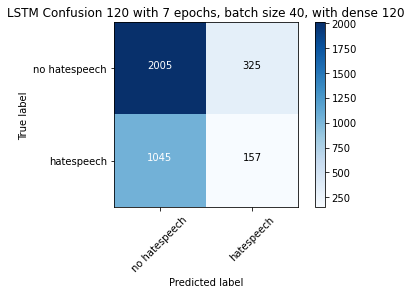

In [34]:
plot_confusion_matrix(cm=cm, classes=plot_labels, title='LSTM Confusion 120 with 7 epochs, batch size 40')